# Selecting a single ensemble member

In this notebook we show how to select a single ensemble member from a set of CMIP6 models.

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import glob
import os.path
import requests
import shutil
import zipfile

import matplotlib.pyplot as plt
import netcdf_scm.io
import scmdata
import tqdm.autonotebook as tqdman

/Users/znicholls/miniconda3/envs/calibration-data/lib/python3.7/site-packages/ipykernel_launcher.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>

In [3]:
plt.rcParams["figure.figsize"] = (12, 8)

<IPython.core.display.Javascript object>

## Download the data

First we need to download some data. Here we use the tas data for the ssp126 experiment. Here we want to use the normalised data i.e. timeseries which are anomalies from a 21-year running mean of the piControl. We also use the annual-mean data.

In [4]:
FORCE_DOWNLOAD = False

<IPython.core.display.Javascript object>

In [5]:
DATA_DIR = os.path.join(".", "tas_ssp126_data")
DATA_DIR

'./tas_ssp126_data'

<IPython.core.display.Javascript object>

In [6]:
zip_file = os.path.join(".", "tas_ssp126.zip")
zip_file

'./tas_ssp126.zip'

<IPython.core.display.Javascript object>

In [7]:
if FORCE_DOWNLOAD:
    os.remove(zip_file)

if not os.path.isfile(zip_file):
    print("Downloading tas ssp126 data")
    params = (
        ("experiment_id", "ssp126"),
        ("variable_id", "tas"),
        ("normalised", "21-yr-running-mean"),
        ("timeseriestype", "average-year-mid-year"),
    )
    url = "https://cmip6.science.unimelb.edu.au/api/v1/download_zip"
    r = requests.get(url, params=params)

    with open(zip_file, "wb") as f:
        f.write(r.content)

<IPython.core.display.Javascript object>

In [8]:
if FORCE_DOWNLOAD:
    shutil.rmtree(DATA_DIR)

if not os.path.isdir(DATA_DIR):
    print("Unzipping data")
    zip_ref = zipfile.ZipFile(zip_file, "r")
    zip_ref.extractall(DATA_DIR)
    zip_ref.close()

<IPython.core.display.Javascript object>

### README

Before using the data, please examine the README

In [9]:
with open(os.path.join(DATA_DIR, "README.txt"), "r") as fh:
    print(fh.read())

README
------

Acknowledging CMIP

The data provided here are derived from the outputs of the `Coupled Model Intercomparison Project <https://www.wcrp-climate.org/wgcm-cmip>`_ data.
This means that you **must** abide by the terms of use of the data, in particular the required acknowledgement statements (see the `CMIP5 terms of use <https://pcmdi.llnl.gov/mips/cmip5/terms-of-use.html>`_ and `CMIP6 terms of use <https://pcmdi.llnl.gov/CMIP6/TermsOfUse/TermsOfUse6-1.html>`_).

To make it easier to do this, we have developed some basic tools which simplify the process of checking model license terms and creating the tables required in publications to cite CMIP data (see the `our tools here <https://netcdf-scm.readthedocs.io/en/latest/usage/using-cmip-data.html>`_).
However, we provide no guarantees that these tools are up to date so all users should double check that they do in fact produce output consistent with the terms of use referenced above (and if there are issues, please raise an i

<IPython.core.display.Javascript object>

## Making plots

In [10]:
ssp126_tas_files = sorted(
    glob.glob(
        os.path.join(
            DATA_DIR, "average-year-mid-year", "**", "NORMED*tas*_ssp126_*.MAG"
        ),
        recursive=True,
    )
)
len(ssp126_tas_files)

106

<IPython.core.display.Javascript object>

In [11]:
ssp126_tas_files

['./tas_ssp126_data/average-year-mid-year/CMIP6/ScenarioMIP/CAS/FGOALS-g3/ssp126/r1i1p1f1/Amon/tas/gn/v20190818/NORMED_netcdf-scm_tas_Amon_FGOALS-g3_ssp126_r1i1p1f1_gn_1850-2100.MAG',
 './tas_ssp126_data/average-year-mid-year/CMIP6/ScenarioMIP/CCCma/CanESM5-CanOE/ssp126/r1i1p2f1/Amon/tas/gn/v20190429/NORMED_netcdf-scm_tas_Amon_CanESM5-CanOE_ssp126_r1i1p2f1_gn_1850-2100.MAG',
 './tas_ssp126_data/average-year-mid-year/CMIP6/ScenarioMIP/CCCma/CanESM5-CanOE/ssp126/r2i1p2f1/Amon/tas/gn/v20190429/NORMED_netcdf-scm_tas_Amon_CanESM5-CanOE_ssp126_r2i1p2f1_gn_1850-2100.MAG',
 './tas_ssp126_data/average-year-mid-year/CMIP6/ScenarioMIP/CCCma/CanESM5-CanOE/ssp126/r3i1p2f1/Amon/tas/gn/v20190429/NORMED_netcdf-scm_tas_Amon_CanESM5-CanOE_ssp126_r3i1p2f1_gn_1850-2100.MAG',
 './tas_ssp126_data/average-year-mid-year/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp126/r10i1p1f1/Amon/tas/gn/v20190429/NORMED_netcdf-scm_tas_Amon_CanESM5_ssp126_r10i1p1f1_gn_1850-2100.MAG',
 './tas_ssp126_data/average-year-mid-year/CMIP6/Sc

<IPython.core.display.Javascript object>

In [12]:
all_data = scmdata.run_append(
    [
        netcdf_scm.io.load_mag_file(f, drs="CMIP6Output")
        for f in tqdman.tqdm(ssp126_tas_files)
    ]
).filter(region="World")
all_data

  0%|          | 0/106 [00:00<?, ?it/s]

<scmdata.ScmRun (timeseries: 106, timepoints: 451)>
Time:
	Start: 1850-07-01T00:00:00
	End: 2300-07-01T00:00:00
Meta:
	      activity_id  climate_model  member_id mip_era        model region  \
	0     ScenarioMIP      FGOALS-g3   r1i1p1f1   CMIP6  unspecified  World   
	69    ScenarioMIP  CanESM5-CanOE   r1i1p2f1   CMIP6  unspecified  World   
	138   ScenarioMIP  CanESM5-CanOE   r2i1p2f1   CMIP6  unspecified  World   
	207   ScenarioMIP  CanESM5-CanOE   r3i1p2f1   CMIP6  unspecified  World   
	276   ScenarioMIP        CanESM5  r10i1p1f1   CMIP6  unspecified  World   
	...           ...            ...        ...     ...          ...    ...   
	6969  ScenarioMIP          CESM2  r10i1p1f1   CMIP6  unspecified  World   
	7038  ScenarioMIP          CESM2  r11i1p1f1   CMIP6  unspecified  World   
	7107  ScenarioMIP          CESM2   r1i1p1f1   CMIP6  unspecified  World   
	7176  ScenarioMIP          CESM2   r2i1p1f1   CMIP6  unspecified  World   
	7245  ScenarioMIP          CESM2   r4i1p1f1  

<IPython.core.display.Javascript object>

## Raw plot

If we simply plot the data, including all ensemble members, the picture can be overwhelmed by larger ensembles e.g. CanESM5 and CNRM-ESM2-1.

<AxesSubplot:xlabel='time', ylabel='K'>

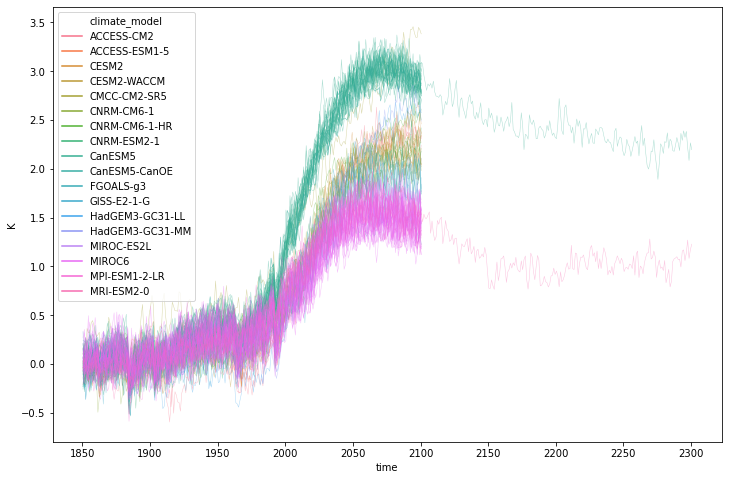

<IPython.core.display.Javascript object>

In [13]:
all_data = scmdata.ScmRun(all_data.timeseries().sort_index())
all_data.lineplot(
    hue="climate_model", units="member_id", estimator=None, alpha=0.4, linewidth=0.5
)

## Single ensemble member

We can instead just pick the first (by whatever measure we choose, here we just use `min` which picks `r10i1p1f1` over `r1i1p1f1` which is perhaps not the best way) ensemble member from model ensemble, this can provide a clearer picture.

In [14]:
def take_first_ensemble_member(idf):
    member_ids = idf["member_id"].unique()
    first_member = min(member_ids)
    keep = idf.filter(member_id=first_member)

    return keep

<IPython.core.display.Javascript object>

In [15]:
all_data_single_ensemble_member = all_data.groupby("climate_model").map(
    take_first_ensemble_member
)
all_data_single_ensemble_member

<scmdata.ScmRun (timeseries: 18, timepoints: 451)>
Time:
	Start: 1850-07-01T00:00:00
	End: 2300-07-01T00:00:00
Meta:
	    activity_id    climate_model  member_id mip_era        model region  \
	0   ScenarioMIP       ACCESS-CM2   r1i1p1f1   CMIP6  unspecified  World   
	1   ScenarioMIP    ACCESS-ESM1-5   r1i1p1f1   CMIP6  unspecified  World   
	2   ScenarioMIP            CESM2  r10i1p1f1   CMIP6  unspecified  World   
	3   ScenarioMIP      CESM2-WACCM   r1i1p1f1   CMIP6  unspecified  World   
	4   ScenarioMIP     CMCC-CM2-SR5   r1i1p1f1   CMIP6  unspecified  World   
	5   ScenarioMIP       CNRM-CM6-1   r1i1p1f2   CMIP6  unspecified  World   
	6   ScenarioMIP    CNRM-CM6-1-HR   r1i1p1f2   CMIP6  unspecified  World   
	7   ScenarioMIP      CNRM-ESM2-1   r1i1p1f2   CMIP6  unspecified  World   
	8   ScenarioMIP          CanESM5  r10i1p1f1   CMIP6  unspecified  World   
	9   ScenarioMIP    CanESM5-CanOE   r1i1p2f1   CMIP6  unspecified  World   
	10  ScenarioMIP        FGOALS-g3   r1i1p1f1   

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='time', ylabel='K'>

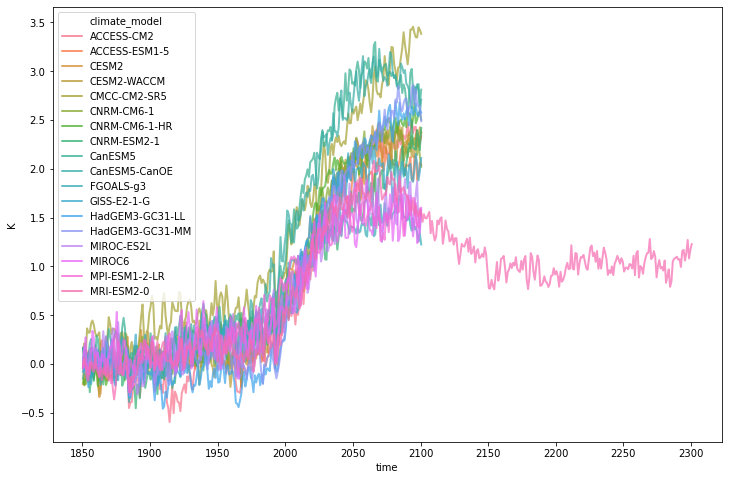

<IPython.core.display.Javascript object>

In [16]:
all_data_single_ensemble_member.lineplot(
    hue="climate_model", units="member_id", estimator=None, alpha=0.7, linewidth=2
)